In [1]:
import cnn_functions
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torchvision import  transforms
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.io import read_image
from torch.utils.data import Dataset, Subset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Binary model

In [11]:
labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Define the dataset object
class BinaryDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.transform = transform
        self.img_dir = img_dir
        self.img_labels = []
        self.img_paths = []
        for label, generated in enumerate(["REAL", "FAKE"]):
            image_files = os.listdir(img_dir + "/" + generated)
            for image_name in image_files:
                self.img_labels.append(label)
                self.img_paths.append(os.path.join(generated, image_name))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_paths[idx])
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [12]:
# Compose the transform to perform on the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = BinaryDataset(img_dir='./archive/train', transform=transform)

# 10k samples for validation and 10k samples for testing
test_val_ds= BinaryDataset(img_dir='./archive/test', transform=transform)
# Perform a stratified split
idx_train, idx_val = train_test_split(
    range(len(test_val_ds)),
    test_size=0.5,  # 50-50 split
    stratify=test_val_ds.img_labels,
    random_state=0
)
# Define the subsets
test_ds = Subset(test_val_ds, idx_train)
validation_ds = Subset(test_val_ds, idx_val)

In [4]:
def untrained_binary(lr):
    # Load the pretrained ResNet18 model
    model = resnet18()

    # Replace the last fully connected layer
    model.fc = torch.nn.Linear(512, 2)

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    #optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, momentum=0.9, weight_decay=0.0001)
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    
    return model, optimizer



 - untrained_binary_lr0001_batch4_epochs30

Epoch 1; Train err = 8.77; Val err = 9.02; Loss: 0.4088
Epoch 2; Train err = 7.44; Val err = 7.82; Loss: 0.2542
Epoch 3; Train err = 5.85; Val err = 6.42; Loss: 0.2118
Epoch 4; Train err = 5.38; Val err = 6.35; Loss: 0.1838
Epoch 5; Train err = 4.68; Val err = 6.04; Loss: 0.1646
Epoch 10; Train err = 2.95; Val err = 5.29; Loss: 0.1003
Epoch 15; Train err = 1.31; Val err = 5.12; Loss: 0.0634
Epoch 20; Train err = 1.06; Val err = 5.26; Loss: 0.0437
Epoch 25; Train err = 0.60; Val err = 5.03; Loss: 0.0318
Epoch 30; Train err = 1.90; Val err = 6.63; Loss: 0.0257


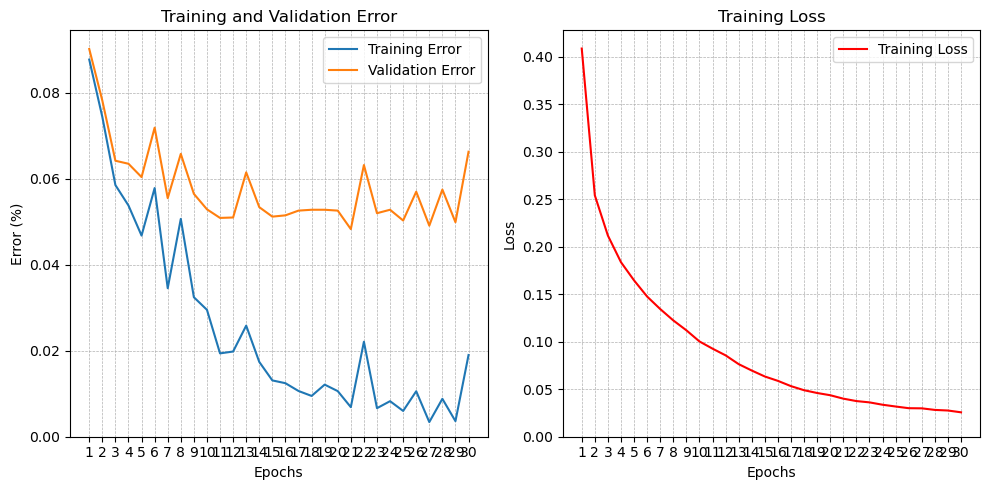



 - untrained_binary_lr0001_batch256_epochs30

Epoch 1; Train err = 10.38; Val err = 12.23; Loss: 0.3464
Epoch 2; Train err = 6.10; Val err = 8.94; Loss: 0.2173
Epoch 3; Train err = 7.47; Val err = 11.03; Loss: 0.1581
Epoch 4; Train err = 5.29; Val err = 10.39; Loss: 0.1150
Epoch 5; Train err = 2.77; Val err = 8.79; Loss: 0.0799
Epoch 10; Train err = 1.86; Val err = 8.23; Loss: 0.0290
Epoch 15; Train err = 0.93; Val err = 7.83; Loss: 0.0204
Epoch 20; Train err = 4.35; Val err = 10.09; Loss: 0.0153
Epoch 25; Train err = 1.34; Val err = 7.81; Loss: 0.0151
Epoch 30; Train err = 1.38; Val err = 7.91; Loss: 0.0103


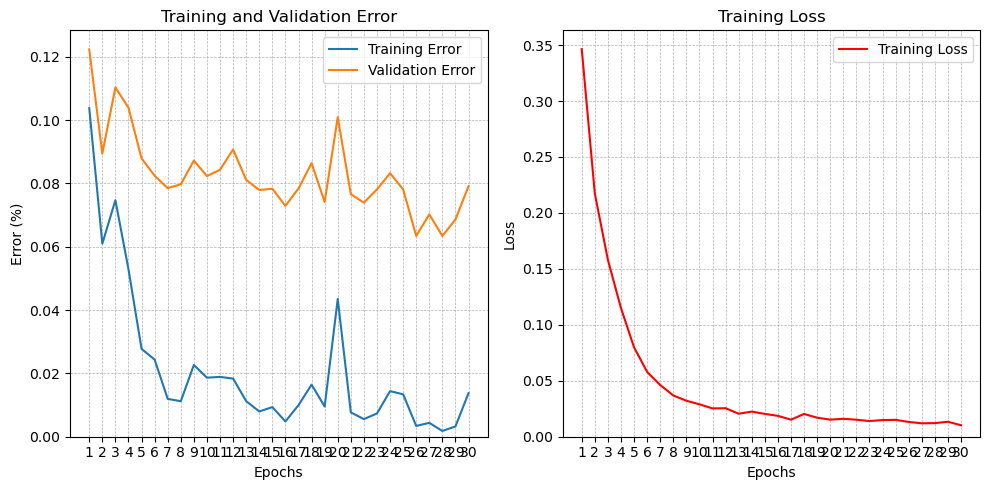



 - untrained_binary_lr0001_batch1024_epochs30

Epoch 1; Train err = 10.93; Val err = 13.37; Loss: 0.3785
Epoch 2; Train err = 6.64; Val err = 11.12; Loss: 0.2300
Epoch 3; Train err = 4.67; Val err = 11.86; Loss: 0.1527
Epoch 4; Train err = 2.28; Val err = 11.32; Loss: 0.0838
Epoch 5; Train err = 1.13; Val err = 10.89; Loss: 0.0462
Epoch 10; Train err = 1.44; Val err = 10.89; Loss: 0.0171
Epoch 15; Train err = 1.26; Val err = 10.79; Loss: 0.0044
Epoch 20; Train err = 0.00; Val err = 9.07; Loss: 0.0001
Epoch 25; Train err = 0.00; Val err = 8.92; Loss: 0.0000
Epoch 30; Train err = 0.00; Val err = 8.91; Loss: 0.0000


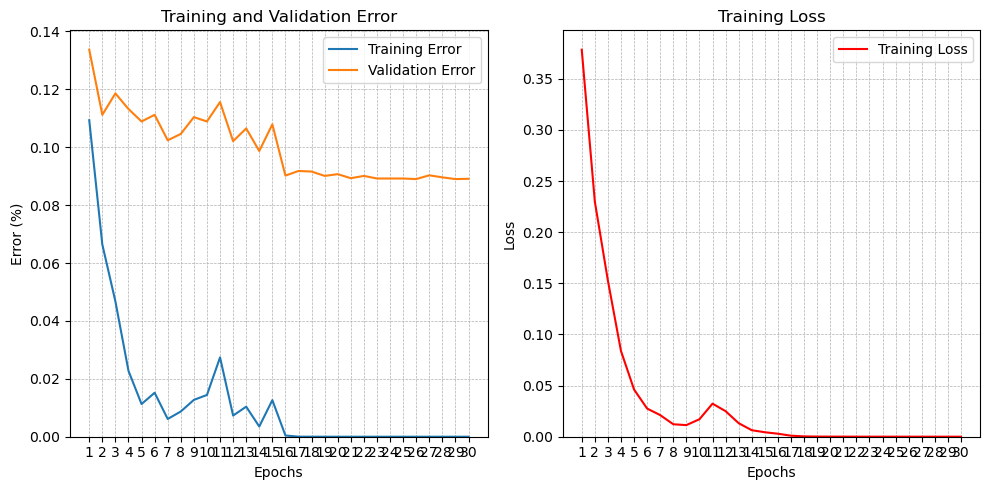



 - untrained_binary_lr-05_batch4_epochs30

Epoch 1; Train err = 19.49; Val err = 20.76; Loss: 0.5727
Epoch 2; Train err = 15.09; Val err = 16.26; Loss: 0.4754
Epoch 3; Train err = 11.87; Val err = 12.74; Loss: 0.3992
Epoch 4; Train err = 10.11; Val err = 11.00; Loss: 0.3381
Epoch 5; Train err = 8.88; Val err = 9.89; Loss: 0.2916
Epoch 10; Train err = 4.92; Val err = 7.30; Loss: 0.1830
Epoch 15; Train err = 3.31; Val err = 6.77; Loss: 0.1229
Epoch 20; Train err = 2.04; Val err = 7.37; Loss: 0.0811
Epoch 25; Train err = 0.73; Val err = 6.46; Loss: 0.0547
Epoch 30; Train err = 0.43; Val err = 6.56; Loss: 0.0387


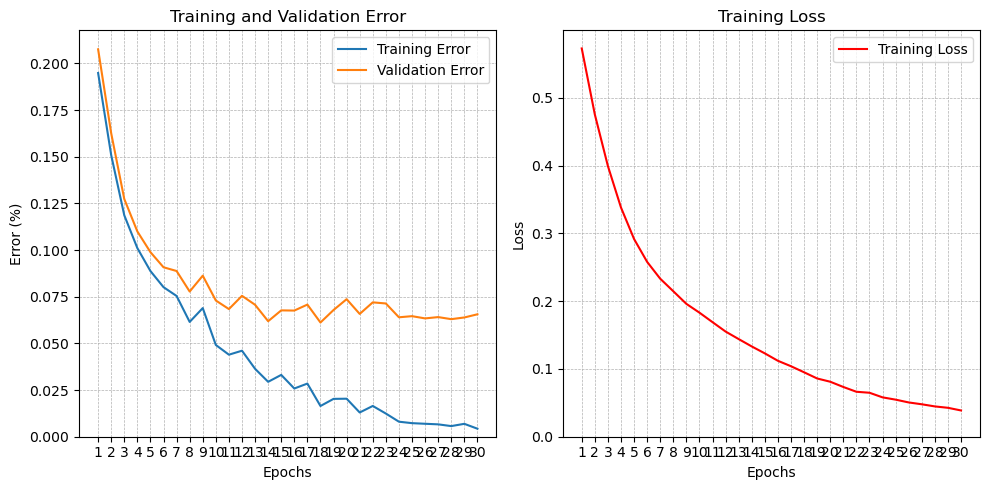



 - untrained_binary_lr-05_batch256_epochs30

Epoch 1; Train err = 17.12; Val err = 19.81; Loss: 0.4937
Epoch 2; Train err = 12.94; Val err = 16.81; Loss: 0.3618
Epoch 3; Train err = 10.11; Val err = 15.42; Loss: 0.2994
Epoch 4; Train err = 7.61; Val err = 14.43; Loss: 0.2523
Epoch 5; Train err = 5.65; Val err = 14.32; Loss: 0.2112
Epoch 10; Train err = 0.07; Val err = 14.27; Loss: 0.0403
Epoch 15; Train err = 0.00; Val err = 14.30; Loss: 0.0079
Epoch 20; Train err = 0.01; Val err = 14.48; Loss: 0.0040
Epoch 25; Train err = 0.01; Val err = 14.13; Loss: 0.0030
Epoch 30; Train err = 0.00; Val err = 13.87; Loss: 0.0025


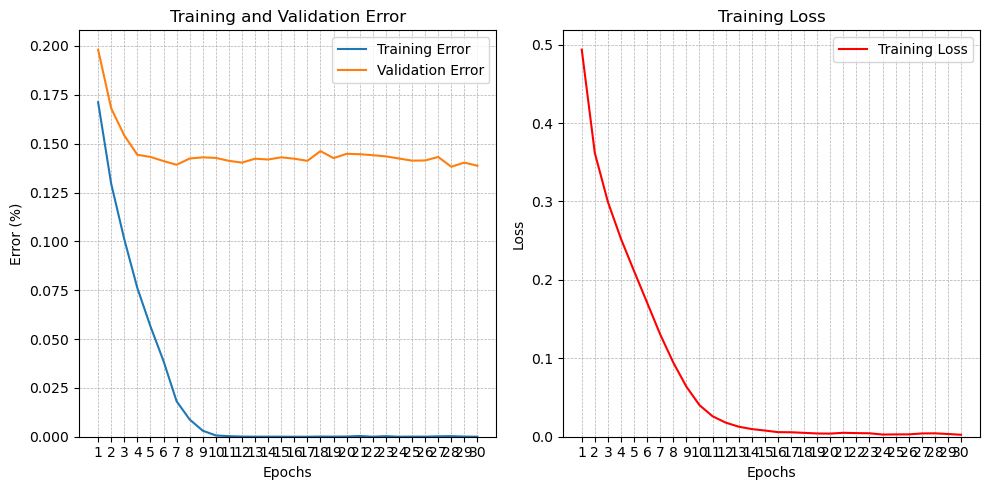



 - untrained_binary_lr-05_batch1024_epochs30

Epoch 1; Train err = 22.11; Val err = 23.96; Loss: 0.5604
Epoch 2; Train err = 17.60; Val err = 20.62; Loss: 0.4342
Epoch 3; Train err = 15.00; Val err = 18.96; Loss: 0.3768
Epoch 4; Train err = 12.98; Val err = 17.52; Loss: 0.3351
Epoch 5; Train err = 11.21; Val err = 16.68; Loss: 0.3014
Epoch 10; Train err = 4.01; Val err = 15.53; Loss: 0.1642
Epoch 15; Train err = 0.29; Val err = 15.45; Loss: 0.0543
Epoch 20; Train err = 0.00; Val err = 15.61; Loss: 0.0134
Epoch 25; Train err = 0.00; Val err = 15.52; Loss: 0.0051
Epoch 30; Train err = 0.00; Val err = 15.56; Loss: 0.0026


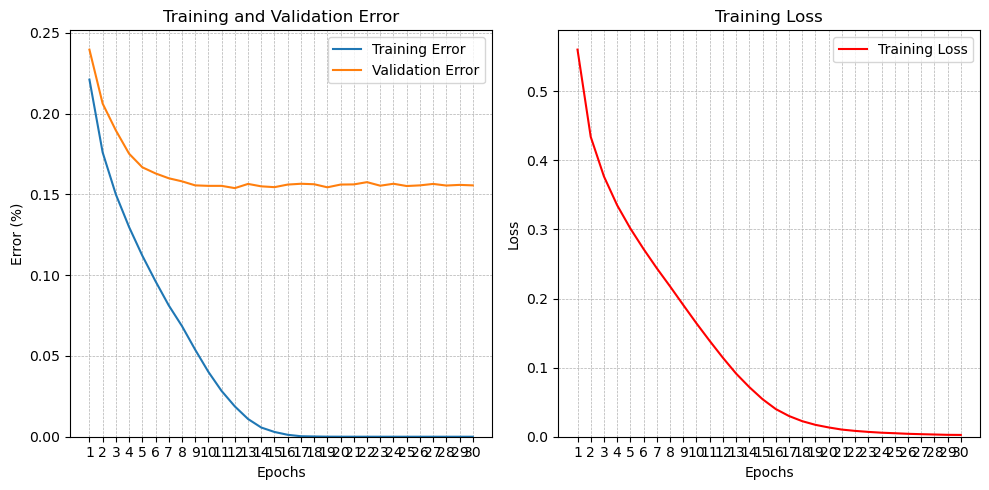

In [5]:
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [4, 256, 1024]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = untrained_binary(lr)

        print(f"\n\n - untrained_binary_lr{str(lr)[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/untrained_binary_lr{str(lr)[2:]}_batch{batch_size}_epochs{epochs}.pth')

### Confusion matrix

Test accuracy: 93.44%


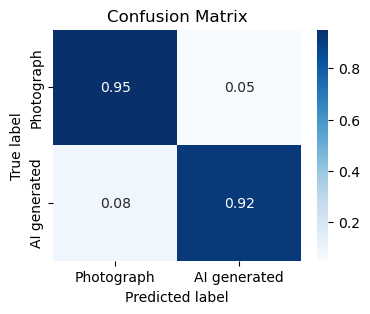

In [20]:
test_loader = DataLoader(validation_ds, batch_size=1000, shuffle=True)

model, _ = untrained_binary(1)
model.load_state_dict(torch.load('./weights/untrained_binary_lr-05_batch4_epochs30.pth'))
model.eval() 
device = next(model.parameters()).device

total_correct = 0
total_images = 0
confusion_matrix = torch.zeros(2, 2)  

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for label, prediction in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[label.long(), prediction.long()] += 1

accuracy = total_correct / total_images
test_error = 1 - accuracy

print(f'Test accuracy: {accuracy*100:.2f}%')

confusion_matrix_np = confusion_matrix.numpy()

def plot_confusion_matrix(cm, class_names):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['Photograph', 'AI generated']  
plot_confusion_matrix(confusion_matrix_np, class_names)

# Multiclass model

In [2]:
labels_map = {
    0: "REAL Truck",
    1: "REAL Car",
    2: "REAL Bird",
    3: "REAL Cat",
    4: "REAL Deer",
    5: "REAL Dog",
    6: "REAL Frog",
    7: "REAL Horse",
    8: "REAL Ship",
    9: "REAL Plane",
    10: "FAKE Truck",
    11: "FAKE Car",
    12: "FAKE Bird",
    13: "FAKE Cat",
    14: "FAKE Deer",
    15: "FAKE Dog",
    16: "FAKE Frog",
    17: "FAKE Horse",
    18: "FAKE Ship",
    19: "FAKE Plane"
}

class MulticlassDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.transform = transform
        self.img_dir = img_dir
        self.img_labels = []
        self.img_paths = []
        for g, generated in enumerate(["REAL", "FAKE"]):
            image_files = os.listdir(img_dir + "/" + generated)
            for label, image_name in enumerate(image_files):
                self.img_labels.append(label%10 + g*10)
                self.img_paths.append(os.path.join(generated, image_name))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_paths[idx])
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [3]:
# Compose the transform to perform on the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = MulticlassDataset(img_dir='./archive/train', transform=transform)

# 10k samples for validation and 10k samples for testing
test_val_ds= MulticlassDataset(img_dir='./archive/test', transform=transform)
# Perform a stratified split
idx_train, idx_val = train_test_split(
    range(len(test_val_ds)),
    test_size=0.5,  # 50-50 split
    stratify=test_val_ds.img_labels,
    random_state=0
)
# Define the subsets
test_ds = Subset(test_val_ds, idx_train)
validation_ds = Subset(test_val_ds, idx_val)

In [5]:
def untrained_multiclass(lr):
    # Load the pretrained ResNet18 model
    model = resnet18()

    # Replace the last fully connected layer
    model.fc = torch.nn.Linear(512, 20) 
  
    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    #optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, momentum=0.9, weight_decay=0.0001)
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    
    return model, optimizer



 - untrained_multiclass_lr0001_batch4_epochs30

Epoch 1; Train err = 39.02; Val err = 39.86; Loss: 1.8890
Epoch 2; Train err = 34.88; Val err = 37.28; Loss: 1.2518
Epoch 3; Train err = 26.47; Val err = 28.70; Loss: 1.0025
Epoch 4; Train err = 22.87; Val err = 26.21; Loss: 0.8667
Epoch 5; Train err = 21.78; Val err = 25.03; Loss: 0.7653
Epoch 10; Train err = 15.91; Val err = 24.37; Loss: 0.4857
Epoch 15; Train err = 21.53; Val err = 32.81; Loss: 0.3295
Epoch 20; Train err = 5.99; Val err = 21.03; Loss: 0.2260
Epoch 25; Train err = 5.25; Val err = 20.94; Loss: 0.1654
Epoch 30; Train err = 2.87; Val err = 20.15; Loss: 0.1295


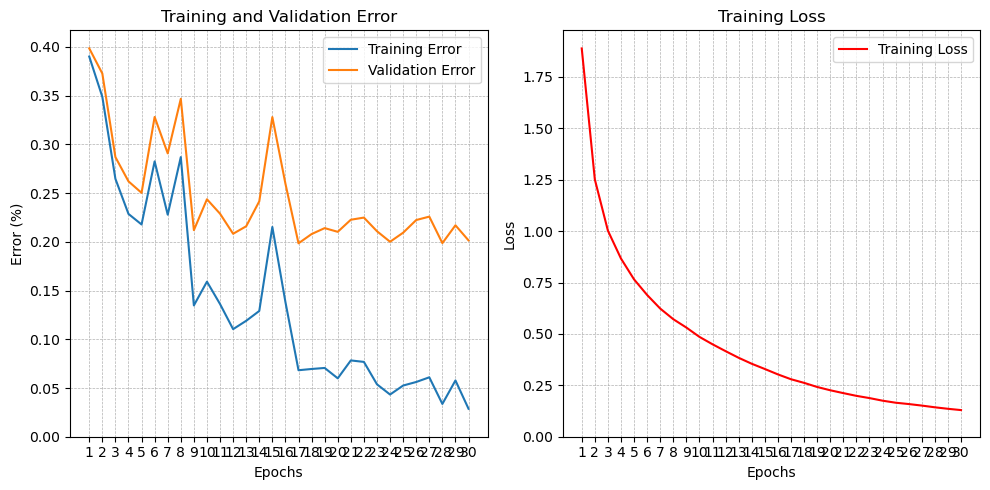



 - untrained_multiclass_lr0001_batch256_epochs30

Epoch 1; Train err = 35.65; Val err = 40.46; Loss: 1.5658
Epoch 2; Train err = 31.36; Val err = 37.48; Loss: 1.0209
Epoch 3; Train err = 21.37; Val err = 32.83; Loss: 0.8023
Epoch 4; Train err = 16.35; Val err = 31.35; Loss: 0.6316
Epoch 5; Train err = 13.13; Val err = 31.83; Loss: 0.4862
Epoch 10; Train err = 5.38; Val err = 32.50; Loss: 0.1049
Epoch 15; Train err = 4.67; Val err = 32.13; Loss: 0.0689
Epoch 20; Train err = 2.19; Val err = 30.20; Loss: 0.0638
Epoch 25; Train err = 1.41; Val err = 29.20; Loss: 0.0489
Epoch 30; Train err = 1.18; Val err = 29.08; Loss: 0.0348


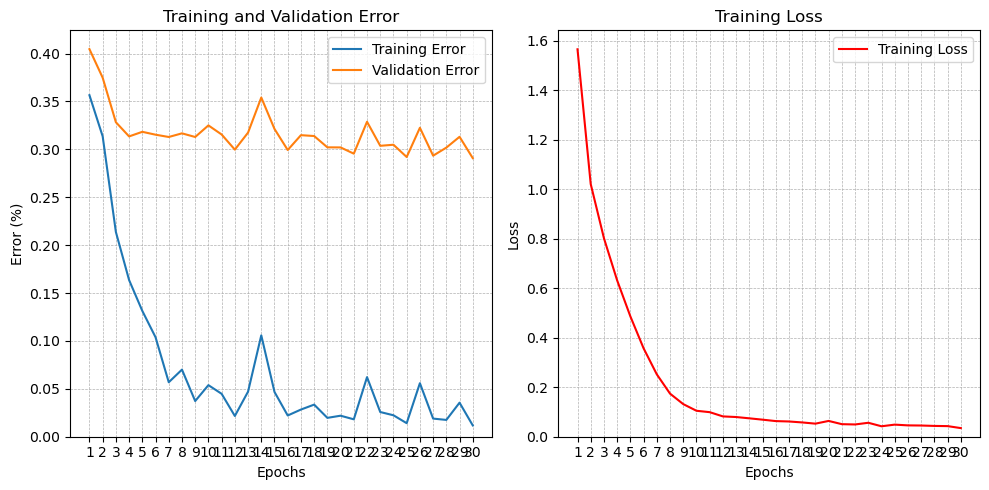



 - untrained_multiclass_lr0001_batch1024_epochs30

Epoch 1; Train err = 45.67; Val err = 48.86; Loss: 1.8891
Epoch 2; Train err = 34.54; Val err = 41.20; Loss: 1.2522
Epoch 3; Train err = 27.35; Val err = 38.45; Loss: 0.9883
Epoch 4; Train err = 20.59; Val err = 36.32; Loss: 0.7878
Epoch 5; Train err = 14.49; Val err = 36.09; Loss: 0.6083
Epoch 10; Train err = 0.24; Val err = 36.22; Loss: 0.0416
Epoch 15; Train err = 0.00; Val err = 35.02; Loss: 0.0040
Epoch 20; Train err = 0.00; Val err = 35.13; Loss: 0.0018
Epoch 25; Train err = 0.00; Val err = 35.09; Loss: 0.0010
Epoch 30; Train err = 0.00; Val err = 35.14; Loss: 0.0007


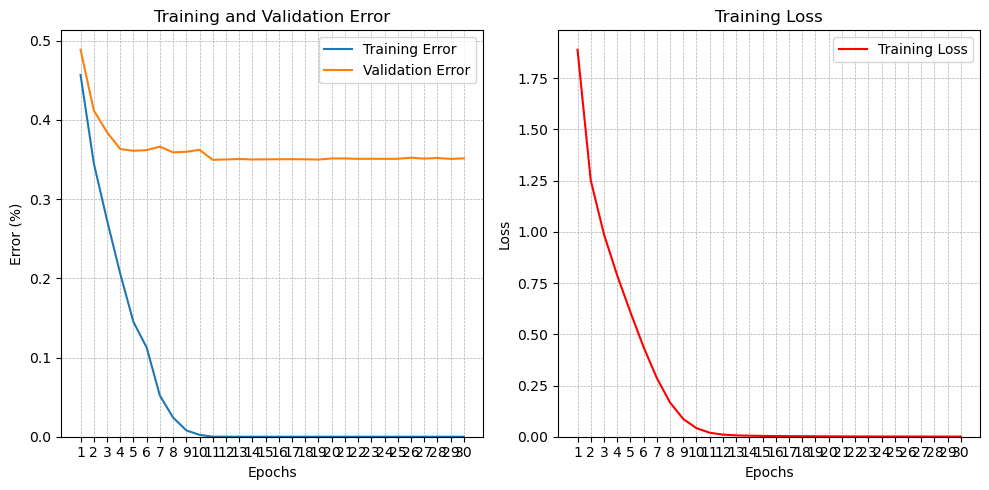



 - untrained_multiclass_lr-05_batch4_epochs30

Epoch 1; Train err = 58.15; Val err = 58.60; Loss: 2.4007
Epoch 2; Train err = 51.28; Val err = 51.87; Loss: 1.9956
Epoch 3; Train err = 45.92; Val err = 47.40; Loss: 1.8116
Epoch 4; Train err = 42.05; Val err = 43.75; Loss: 1.6674
Epoch 5; Train err = 39.51; Val err = 41.43; Loss: 1.5570
Epoch 10; Train err = 29.76; Val err = 33.62; Loss: 1.1744
Epoch 15; Train err = 23.20; Val err = 28.90; Loss: 0.9458
Epoch 20; Train err = 19.62; Val err = 27.25; Loss: 0.7840
Epoch 25; Train err = 16.52; Val err = 26.36; Loss: 0.6550
Epoch 30; Train err = 12.70; Val err = 25.08; Loss: 0.5483


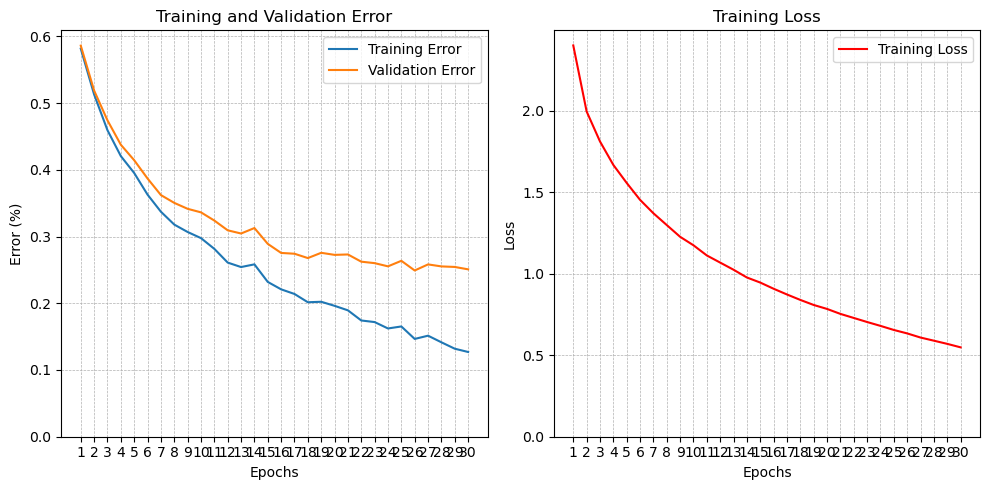



 - untrained_multiclass_lr-05_batch256_epochs30

Epoch 1; Train err = 62.04; Val err = 62.98; Loss: 2.4453
Epoch 2; Train err = 52.43; Val err = 55.19; Loss: 1.8403
Epoch 3; Train err = 46.56; Val err = 50.66; Loss: 1.5843
Epoch 4; Train err = 42.24; Val err = 47.54; Loss: 1.4236
Epoch 5; Train err = 38.68; Val err = 45.41; Loss: 1.3043
Epoch 10; Train err = 24.67; Val err = 41.12; Loss: 0.8991
Epoch 15; Train err = 13.02; Val err = 40.03; Loss: 0.5957
Epoch 20; Train err = 4.20; Val err = 40.25; Loss: 0.3358
Epoch 25; Train err = 0.49; Val err = 40.96; Loss: 0.1520
Epoch 30; Train err = 0.03; Val err = 41.28; Loss: 0.0586


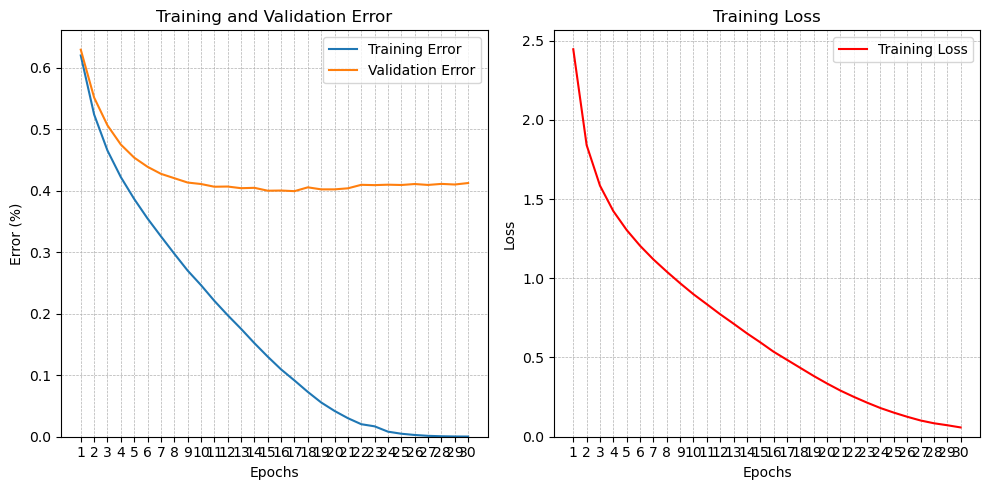



 - untrained_multiclass_lr-05_batch1024_epochs30

Epoch 1; Train err = 73.80; Val err = 75.01; Loss: 2.7758
Epoch 2; Train err = 62.78; Val err = 65.27; Loss: 2.2083
Epoch 3; Train err = 57.05; Val err = 59.83; Loss: 1.9281
Epoch 4; Train err = 52.97; Val err = 56.55; Loss: 1.7518
Epoch 5; Train err = 49.59; Val err = 53.91; Loss: 1.6251
Epoch 10; Train err = 38.48; Val err = 46.45; Loss: 1.2515
Epoch 15; Train err = 30.32; Val err = 43.39; Loss: 1.0171
Epoch 20; Train err = 22.84; Val err = 41.86; Loss: 0.8180
Epoch 25; Train err = 15.87; Val err = 41.78; Loss: 0.6361
Epoch 30; Train err = 9.42; Val err = 41.73; Loss: 0.4679


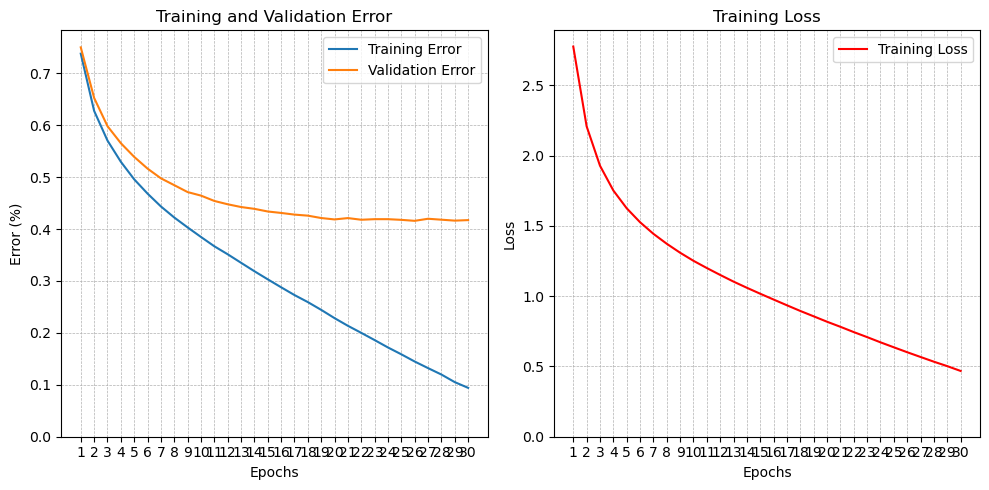

In [10]:
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [4, 256, 1024]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = untrained_multiclass(lr)

        print(f"\n\n - untrained_multiclass_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/untrained_multiclass_lr{str(lr)[2:]}_batch{batch_size}_epochs{epochs}.pth')

## Confusion matrix

In [24]:
def plot_confusion_matrix(cm, class_names, figsize):
    # Normalize the confusion matrix.
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=figsize)
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test accuracy: 79.85%


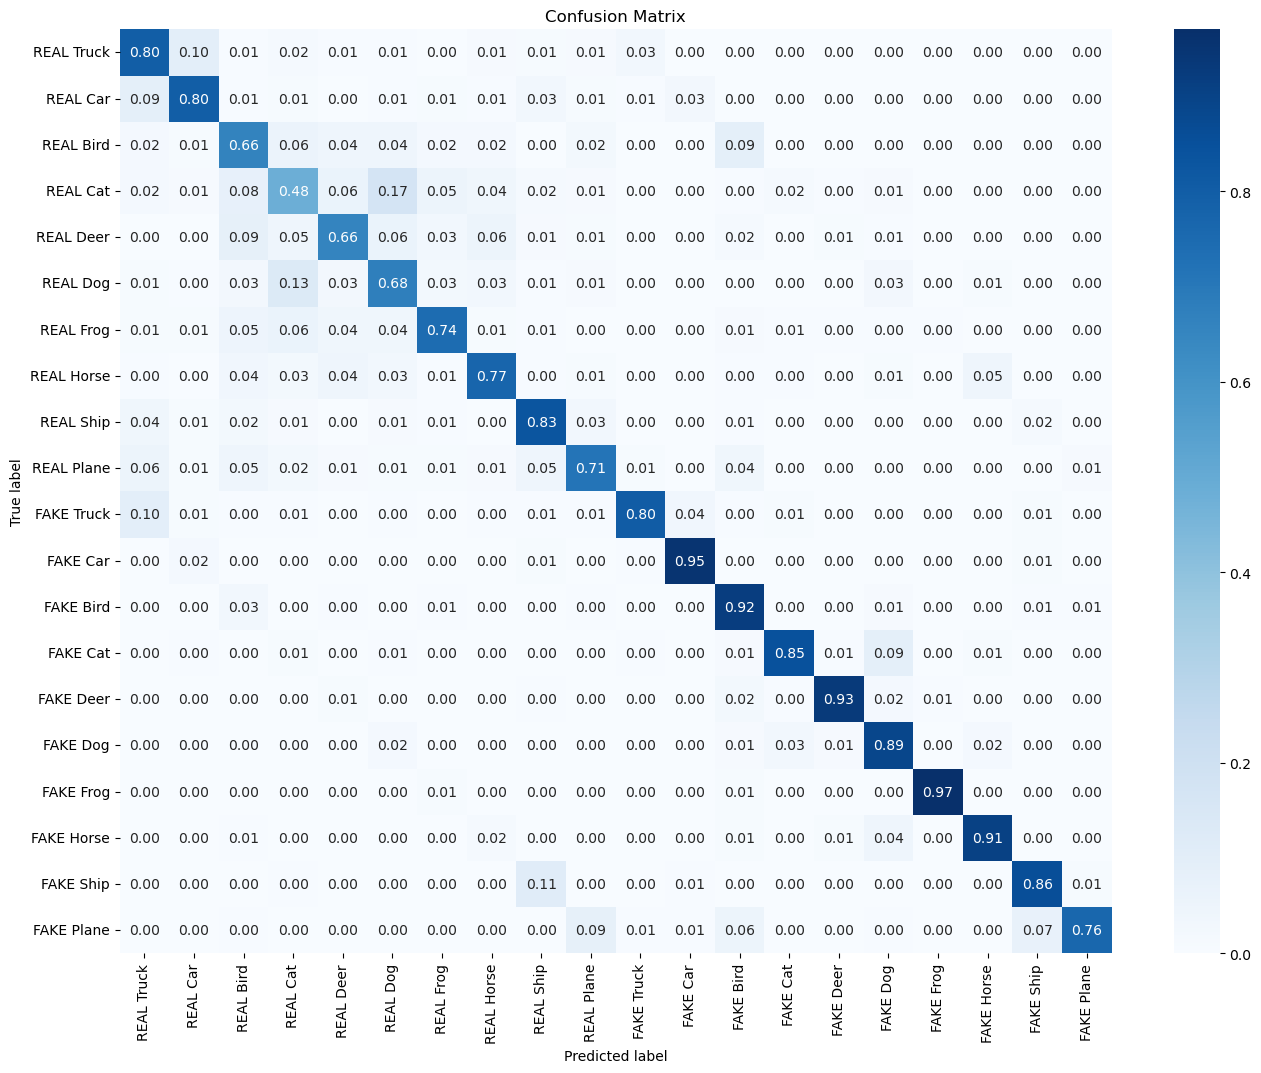

In [25]:
test_loader = DataLoader(validation_ds, batch_size=1000, shuffle=True)

model, _ = untrained_multiclass(1)
model.load_state_dict(torch.load('./weights/untrained_multiclass_lr0001_batch4_epochs30.pth'))
model.eval()  
device = next(model.parameters()).device

total_correct = 0
total_images = 0
confusion_matrix = torch.zeros(20, 20)  

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for label, prediction in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[label.long(), prediction.long()] += 1

accuracy = total_correct / total_images
test_error = 1 - accuracy

print(f'Test accuracy: {accuracy*100:.2f}%')

confusion_matrix_np = confusion_matrix.numpy()

class_names = []
_ = [class_names.append(labels_map[c]) for c in labels_map] 
plot_confusion_matrix(confusion_matrix_np, class_names, (16, 12))

Test accuracy: 94.90%


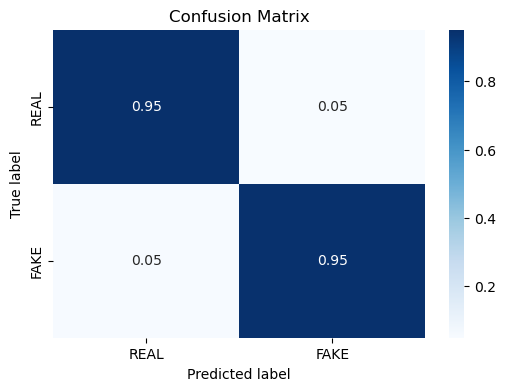

In [13]:
test_loader = DataLoader(validation_ds, batch_size=1000, shuffle=True)

model, _ = untrained_multiclass(1)
model.load_state_dict(torch.load('./weights/untrained_multiclass_lr0001_batch4_epochs30.pth'))
model.eval()  
device = next(model.parameters()).device

total_correct = 0
total_images = 0
confusion_matrix = torch.zeros(2, 2)  

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels // 10
        labels = labels.to(device)

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        predicted = predicted // 10
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for label, prediction in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[label.long(), prediction.long()] += 1

accuracy = total_correct / total_images
test_error = 1 - accuracy

print(f'Test accuracy: {accuracy*100:.2f}%')

confusion_matrix_np = confusion_matrix.numpy()

class_names = ['REAL', 'FAKE']
plot_confusion_matrix(confusion_matrix_np, class_names, (6, 4))

Test accuracy: 83.36%


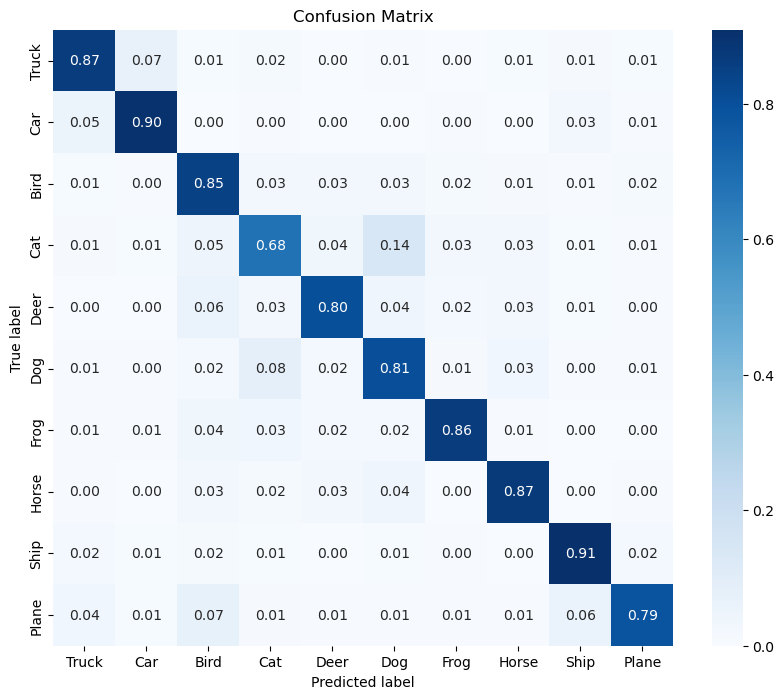

In [14]:
test_loader = DataLoader(validation_ds, batch_size=1000, shuffle=True)

model, _ = untrained_multiclass(1)
model.load_state_dict(torch.load('./weights/untrained_multiclass_lr0001_batch4_epochs30.pth'))
model.eval()  
device = next(model.parameters()).device

total_correct = 0
total_images = 0
confusion_matrix = torch.zeros(10, 10)  

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels % 10
        labels = labels.to(device)

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        predicted = predicted % 10
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for label, prediction in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[label.long(), prediction.long()] += 1

accuracy = total_correct / total_images
test_error = 1 - accuracy

print(f'Test accuracy: {accuracy*100:.2f}%')

confusion_matrix_np = confusion_matrix.numpy()

class_names = []
_ = [class_names.append(str(labels_map[c])[5:]) for c in labels_map] 
plot_confusion_matrix(confusion_matrix_np, class_names[:10], (10, 8))

Forward hook running...
Activations size: torch.Size([1, 64, 8, 8])
Backward hook running...
Gradients size: torch.Size([1, 64, 8, 8])


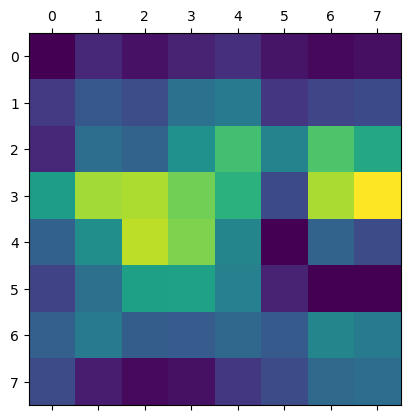

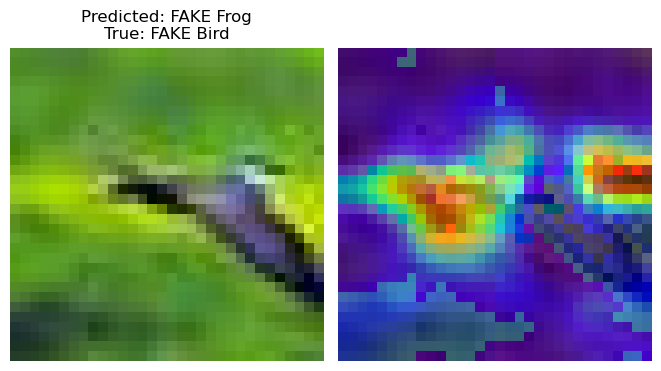

In [52]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import models, transforms
from torchvision.transforms import ToTensor
from PIL import Image
from torchvision.transforms.functional import to_pil_image
from matplotlib import colormaps
import numpy as np
import PIL

# Load the model
model = resnet18()
model.fc = torch.nn.Linear(512, 20) 

model.load_state_dict(torch.load('./weights/untrained_multiclass_lr0001_batch4_epochs30.pth'))
model.eval()
# Choose the layer
target_layer = model.layer1

# defines two global scope variables to store our gradients and activations
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
  global gradients # refers to the variable in the global scope
  print('Backward hook running...')
  gradients = grad_output
  # In this case, we expect it to be torch.Size([batch size, 1024, 8, 8])
  print(f'Gradients size: {gradients[0].size()}') 
  # We need the 0 index because the tensor containing the gradients comes
  # inside a one element tuple.

def forward_hook(module, args, output):
  global activations # refers to the variable in the global scope
  print('Forward hook running...')
  activations = output
  # In this case, we expect it to be torch.Size([batch size, 1024, 8, 8])
  print(f'Activations size: {activations.size()}')

backward_hook = target_layer.register_full_backward_hook(backward_hook, prepend=False)
forward_hook = target_layer.register_forward_hook(forward_hook, prepend=False)

sample_idx = torch.randint(len(train_ds), size=(1,)).item()
label = torch.tensor([train_ds.img_labels[sample_idx]], dtype=torch.long, device='cpu') 
img_path = os.path.join(train_ds.img_dir, train_ds.img_paths[sample_idx])
img = Image.open(img_path).convert('RGB')
image_size = 32
transform = transforms.Compose([
                               transforms.Resize(image_size, antialias=True),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
img_tensor = transform(img)

# Forward pass
output = model(img_tensor.unsqueeze(0))
loss_function = torch.nn.CrossEntropyLoss()
loss = loss_function(output, label)  # Calculate loss
# Backward pass
loss.backward()

# pool the gradients across the channels
pooled_gradients = torch.mean(gradients[0], dim=[0, 2, 3])

# weight the channels by corresponding gradients
for i in range(activations.size()[1]):
    activations[:, i, :, :] *= pooled_gradients[i]

# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
heatmap = F.relu(heatmap)

# normalize the heatmap
heatmap /= torch.max(heatmap)
backward_hook.remove()
forward_hook.remove()

with torch.no_grad():  
    logits = model(img_tensor.unsqueeze(0))
    predicted_label = torch.argmax(logits, dim=1).item()

plt.matshow(heatmap.detach())

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.axis('off') # removes the axis markers
img, true_label = train_ds[sample_idx]
img = img.cpu().numpy().transpose((1, 2, 0))
plt.title(f'Predicted: {labels_map[predicted_label]}\nTrue: {labels_map[true_label]}')
plt.imshow(img)

plt.subplot(1, 3, 2)

plt.axis('off') # removes the axis markers

# First plot the original image
plt.imshow(to_pil_image(img_tensor, mode='RGB'))

# Resize the heatmap to the same size as the input image and defines
# a resample algorithm for increasing image resolution
# we need heatmap.detach() because it can't be converted to numpy array while
# requiring gradients
overlay = to_pil_image(heatmap.detach(), mode='F').resize((32,32), resample=PIL.Image.BICUBIC)

# Apply any colormap you want
cmap = colormaps['jet']
overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)

# Plot the heatmap on the same axes, 
# but with alpha < 1 (this defines the transparency of the heatmap)
plt.imshow(overlay, alpha=0.6, interpolation='nearest')

# Show the plot
plt.tight_layout()
plt.show()